<a href="https://colab.research.google.com/github/jgchen716/spotify-ml/blob/main/Spotify_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Proposal!](https://drive.google.com/file/d/19b-_nB7bUy4G57eL8gKD0lMAyOs1A7MN/view?usp=sharing)

## Initial Setup

In [ ]:
!apt install libkrb5-dev
!pip install seaborn --user
!pip install plotly --user
!pip install imageio --user
!pip install folium --user
!pip install afinn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  comerr-dev krb5-multidev libgssrpc4 libkadm5clnt-mit11 libkadm5srv-mit11
  libkdb5-9
Suggested packages:
  doc-base krb5-doc krb5-user
The following NEW packages will be installed:
  comerr-dev krb5-multidev libgssrpc4 libkadm5clnt-mit11 libkadm5srv-mit11
  libkdb5-9 libkrb5-dev
0 upgraded, 7 newly installed, 0 to remove and 34 not upgraded.
Need to get 349 kB of archives.
After this operation, 1,992 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libgssrpc4 amd64 1.16-2ubuntu0.2 [54.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libkdb5-9 amd64 1.16-2ubuntu0.2 [37.3 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates

In [ ]:
!apt update
!apt install gcc python-dev libkrb5-dev

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:15 http://ppa.launchpad.net/grap

In [1]:
import os
import json

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive

# Mount google drive
DRIVE_MOUNT='/content/gdrive'
drive.mount(DRIVE_MOUNT)

# create folder to write data to
CIS545_FOLDER=os.path.join(DRIVE_MOUNT, 'My Drive', 'CIS545_2021')
HOMEWORK_FOLDER=os.path.join(CIS545_FOLDER, 'SPOTIFY_PROJECT')
os.makedirs(HOMEWORK_FOLDER, exist_ok=True)

Mounted at /content/gdrive


In [ ]:
# get json paths for each individual json file
json_path1 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.0-999.json")
json_path2 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.2000-2999.json")
json_path3 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.3000-3999.json")
json_path4 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.6000-6999.json")
json_path5 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.7000-7999.json")
json_path6 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.8000-8999.json")
json_path7 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.9000-9999.json")
json_path8 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.10000-10999.json")
json_path9 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.13000-13999.json")
json_path10 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.15000-15999.json")
json_path11 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.16000-16999.json")
json_path12 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.19000-19999.json")
json_path13 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.22000-22999.json")
json_path14 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.27000-27999.json")
json_path15 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.28000-28999.json")
json_path16 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.31000-31999.json")
json_path17 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.32000-32999.json")
json_path18 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.34000-34999.json")
json_path19 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.37000-37999.json")
json_path20 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.38000-38999.json")
json_path21 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.41000-41999.json")
json_path22 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.42000-42999.json")
json_path23 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.44000-44999.json")
json_path24 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.47000-47999.json")
json_path25 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.51000-51999.json")

## Data Cleaning and Data Wrangling

In [ ]:
paths = [json_path1, json_path2, json_path3, json_path4, json_path5, 
         json_path6, json_path7, json_path8, json_path9, json_path10, 
         json_path11, json_path12, json_path13, json_path14, json_path15, 
         json_path16, json_path17, json_path18, json_path19, json_path20, 
         json_path21, json_path21, json_path23, json_path24, json_path25]

# create list of dataframes from each json path   
df_list = []
for json_path in paths:
  data = json.load(open(json_path))
  df = pd.DataFrame(data['playlists'])
  df_list.append(df)

# create master playlist df by unioning each df in df_list
playlist_df = pd.concat(df_list)

In [ ]:
playlist_df

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,duration_ms,num_artists,description
0,Throwbacks,false,0,1493424000,52,47,1,"[{'pos': 0, 'artist_name': 'Missy Elliott', 't...",6,11532414,37,NaN
1,Awesome Playlist,false,1,1506556800,39,23,1,"[{'pos': 0, 'artist_name': 'Survivor', 'track_...",5,11656470,21,NaN
2,korean,false,2,1505692800,64,51,1,"[{'pos': 0, 'artist_name': 'Hoody', 'track_uri...",18,14039958,31,NaN
3,mat,false,3,1501027200,126,107,1,"[{'pos': 0, 'artist_name': 'Camille Saint-Saën...",4,28926058,86,NaN
4,90s,false,4,1401667200,17,16,2,"[{'pos': 0, 'artist_name': 'The Smashing Pumpk...",7,4335282,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,reg,false,51995,1504656000,96,75,1,"[{'pos': 0, 'artist_name': 'Ozuna', 'track_uri...",18,21177811,42,NaN
996,hindi,false,51996,1441324800,76,46,1,"[{'pos': 0, 'artist_name': 'Mohammed Rafi', 't...",2,25435178,20,NaN
997,New,false,51997,1508025600,66,52,1,"[{'pos': 0, 'artist_name': 'DJ Drama', 'track_...",47,14452236,41,NaN
998,Lit 🔥,false,51998,1509321600,64,52,1,"[{'pos': 0, 'artist_name': 'Drake', 'track_uri...",12,14188750,44,NaN


In [ ]:
# Create tracks df to map playlist id (pid) to data for each track
df_rows = []
for path in paths:
  data = json.load(open(path))
  
  for d in range(len(data['playlists'])):
    entry = data['playlists'][d]
    track_list = entry['tracks']

    for item in track_list:
      item['pid'] = entry['pid']
      df_rows.append(item)

tracks_df = pd.DataFrame(df_rows)

In [ ]:
tracks_df

,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,pid
0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0
1,1,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone,0
2,2,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit),0
3,3,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified,0
4,4,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot,0
...,...,...,...,...,...,...,...,...,...
1667960,211,Tom Petty,spotify:track:7gSQv1OHpkIoAdUiRLdmI6,spotify:artist:2UZMlIwnkgAEDBsw1Rejkn,I Won't Back Down,spotify:album:5d71Imt5CIb7LpQwDMQ093,178360,Full Moon Fever,51999
1667961,212,Tom Petty,spotify:track:5tVA6TkbaAH9QMITTQRrNv,spotify:artist:2UZMlIwnkgAEDBsw1Rejkn,Free Fallin',spotify:album:5d71Imt5CIb7LpQwDMQ093,256000,Full Moon Fever,51999
1667962,213,Aerosmith,spotify:track:6gQUbFwwdYXlKdmqRoWKJe,spotify:artist:7Ey4PD4MYsKc5I2dolUwbH,Dude (Looks Like A Lady),spotify:album:3XYqOJI1YlX40kJTdzFEzp,265773,Permanent Vacation,51999
1667963,214,Pearl Jam,spotify:track:6QewNVIDKdSl8Y3ycuHIei,spotify:artist:1w5Kfo2jwwIPruYS2UWh56,Even Flow,spotify:album:5B4PYA7wNN4WdEXdIJu58a,292580,Ten,51999


## Visualizing the Data Set & Setting Our Goals: What Does Our Data Look Like?

### A sample data point
Our playlist data has lots of information on each Spotify playlist itself, as well as information on the individual tracks themselves. All this information is held in several smaller json files containing 1000 rows each. Check out an example below! 

In [ ]:
%%html
<img src="https://drive.google.com/uc?export=view&id=1qfhU-mihDWEEuWvxMnXY1xabXwr_0tXS"></img>

One cool thing about our dataset that's worth noting is that it also came with some summary statistics in a `txt` file. For example, they had the number of tracks, number of unique tracks, top playlist titles, and a lot more (screenshot is shown below)! *Note that these summary statistics were taken over all 1 million rows in this dataset, whereas our project used a smaller sample of 25000 rows.*

In [ ]:
%%html
<img src="https://drive.google.com/uc?export=view&id=16-taa2urXoS8vSJN_KWApy9OGP2e-GV1"></img>

### So... what are we working with?
Let's visualize some of the basic information about the data and get a sense of this sampling of playlists. We will answer several of the basic questions: 
*   What are the top 25 songs found in playlists? How many playlists do each of these songs appear in?
*   What is the average playlist length in minutes?
*   What is the average number of songs per playlist?
*   On average, how many songs per artist are found in the same playlist?
*   On average, how many different albums are present in one playlist?
*   On average, how many different artists are present in one playlist?
*   What percentage of playlists are collaborative, i.e. shared with other users?

*   What is the average duration of a given song on a playlist?
*   Is there a relationship between average song length and playlist length?
*   Are playlist titles usually positive, negative, or neutral? (Sentiment Analysis)



#### Looking at Number of Artists, Number of Albums, Number of Tracks, and Playlist Duration

In [ ]:
playlist_df['duration_min'] = playlist_df['duration_ms'].apply(lambda x: x/60000)

Text(0.5, 1.0, 'Playlist Duration (min)')

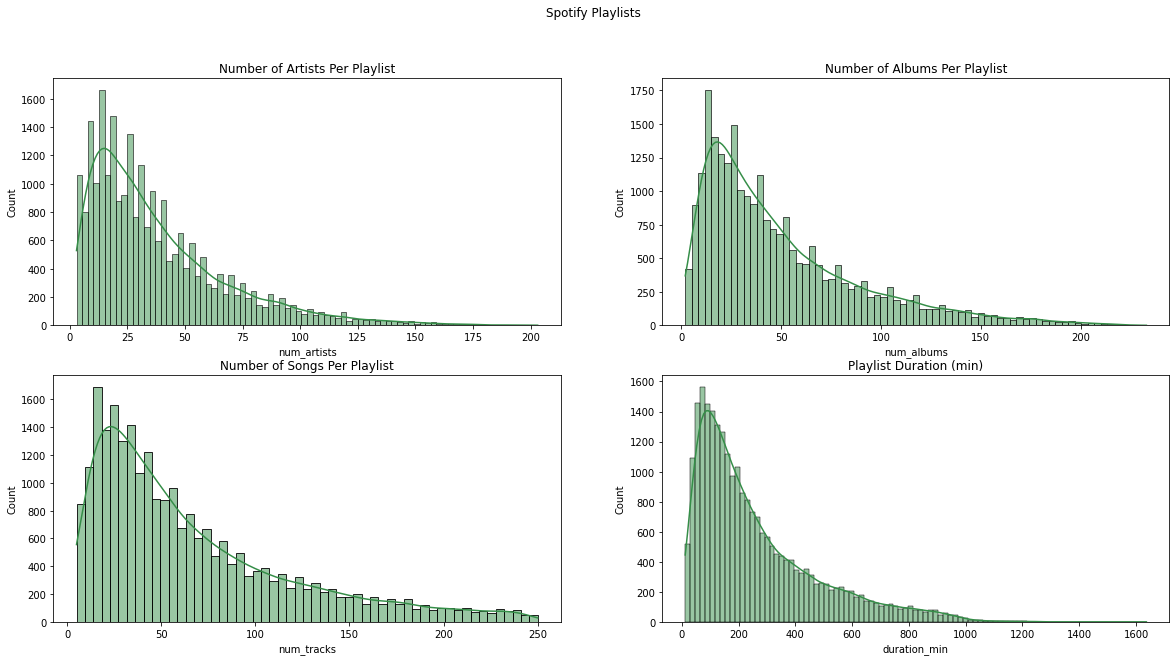

In [ ]:
sns.set_palette("PRGn_r")
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Spotify Playlists')

# number of artists
sns.histplot()
sns.histplot(data=playlist_df, x="num_artists", kde=True, ax=axes[0][0])
axes[0][0].set_title("Number of Artists Per Playlist")

# number of albums
sns.histplot(data=playlist_df, x="num_albums", kde=True, ax=axes[0][1])
axes[0][1].set_title("Number of Albums Per Playlist")

# number of songs
sns.histplot(data=playlist_df, x="num_tracks", kde=True, ax=axes[1][0])
axes[1][0].set_title("Number of Songs Per Playlist")

# duration in minutes
sns.histplot(data=playlist_df, x="duration_min", kde=True, ax=axes[1][1])
axes[1][1].set_title("Playlist Duration (min)")

### What are the top 25 songs found in playlists? How many playlists do each of these songs appear in?

In [ ]:
# count top 100 songs
from collections import Counter

song_counter = Counter(tracks_df['track_name'])
top25_count = song_counter.most_common(25)
top25_df = pd.DataFrame(top25_count)
top25_df.columns=['Song Name', 'Frequency']

fig0 = px.bar(top25_df, x='Song Name', y='Frequency')
fig0.show()

### What is the average playlist length in minutes?

In [ ]:
from math import floor

# average playlist length in minutes
average_playlist_length_min = playlist_df['duration_min'].mean()
print("Average Playlist Length in Minutes:", average_playlist_length_min)

hours = floor(average_playlist_length_min / 60)
extra_mins = round(average_playlist_length_min - hours * 60)
print("In other words, the average playlist is {hrs} hours and {mins} minutes long.".format(hrs=hours, mins=extra_mins))

Average Playlist Length in Minutes: 260.9240714773331
In other words, the average playlist is 4 hours and 21 minutes long.


### What is the average number of songs per playlist?

In [ ]:
song_count = tracks_df.groupby(['pid'])['artist_name'].count()
avg_num_songs = sum(song_count)/len(song_count)

print("Average Number of Songs Per Playlist:", avg_num_songs)

Average Number of Songs Per Playlist: 69.49854166666667


### On average, how many songs per artist are found in the same playlist?

In [ ]:
# empty list to store average number of songs per artist for each playlist
avg_songs_per_artist = []

# split playlist_df based on pid
list_of_dfs = []
for _, g in tracks_df.groupby(tracks_df['pid']):
    list_of_dfs.append(g)

# count number of songs per artist in each playlist 
for df in list_of_dfs:
  c = Counter(df['artist_name'].tolist())
  # divide total number of songs by total number of artists, append to list
  avg_songs_per_artist.append(sum(c.values()) / len(c.keys()))

final_avg_songs_per_artist = sum(avg_songs_per_artist)/len(avg_songs_per_artist)
print("On average, for each artist in a given playlist, that playlist will contain {num:.2f} songs by that artist.".format(num=final_avg_songs_per_artist))

On average, for each artist in a given playlist, that playlist will contain 2.25 songs by that artist.


[Text(0.5, 0, '$log_{10}(number \\; of \\; songs \\; per \\; artist)$')]

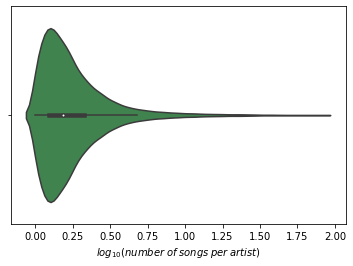

In [ ]:
from math import log

song_per_artist_df = pd.DataFrame(avg_songs_per_artist)
song_per_artist_df.columns=['avg_songs']
song_per_artist_df['log_avg_songs'] = song_per_artist_df['avg_songs'].apply(lambda x: log(x, 10))
ax = sns.violinplot(x=song_per_artist_df['log_avg_songs'], log_scale=True, kde=True)
ax.set(xlabel="$log_{10}(number \; of \; songs \; per \; artist)$")

### On average, how many different albums are present in one playlist?

In [ ]:
# list to store number of albums in each playlist
num_albums_list = []
# list to store number of artists in each playlist
num_artists_list = []

for df in list_of_dfs:
  num_albums = Counter(df['album_name'])
  num_albums_list.append(len(num_albums))

  num_artists = Counter(df['artist_name'])
  num_artists_list.append(len(num_artists))

In [ ]:
avg_num_albums = sum(num_albums_list)/len(num_albums_list)
print("Average number of albums in playlist:", avg_num_albums)

Average number of albums in playlist: 48.940958333333334


### On average, how many different artists are present in one playlist?

In [ ]:
avg_num_artists = sum(num_artists_list)/len(num_artists_list)
print("Average number of artists in playlist:", avg_num_artists)

Average number of artists in playlist: 38.24475


### What is the average number of followers on a given playlist?

In [ ]:
avg_num_followers = playlist_df['num_followers'].mean()
print("Average Number of Followers Per Playlist:", avg_num_followers)

Average Number of Followers Per Playlist: 2.43856


### What percentage of playlists are collaborative, i.e. shared with other users?

In [ ]:
collaborative_count = playlist_df.groupby(['collaborative']).count()['name'].tolist()
percent_collab = collaborative_count[1] / sum(collaborative_count)
print("Percentage of Playlists that are Collaborative:", percent_collab)

Percentage of Playlists that are Collaborative: 0.02212


### What is the average length of a song in a playlist?

In [ ]:
average_duration_song = sum(tracks_df['duration_ms'])/len(tracks_df['duration_ms'])
average_duration_song = average_duration_song / 60000
minutes = floor(average_duration_song)
seconds = round((average_duration_song - minutes) * 60)
print("The average length of a song in a playlist is {mins} minutes and {secs} seconds.".format(mins=minutes, secs=seconds))

The average length of a song in a playlist is 3 minutes and 55 seconds.


### Is there a relationship between average song length in a playlist and average playlist length?

In [ ]:
playlist_df['avg_song_length_min'] = playlist_df['duration_min'] / playlist_df['num_tracks']

[Text(0, 0.5, 'Playlist Duration (min)'),
 Text(0.5, 0, 'Average Song Length (min)')]

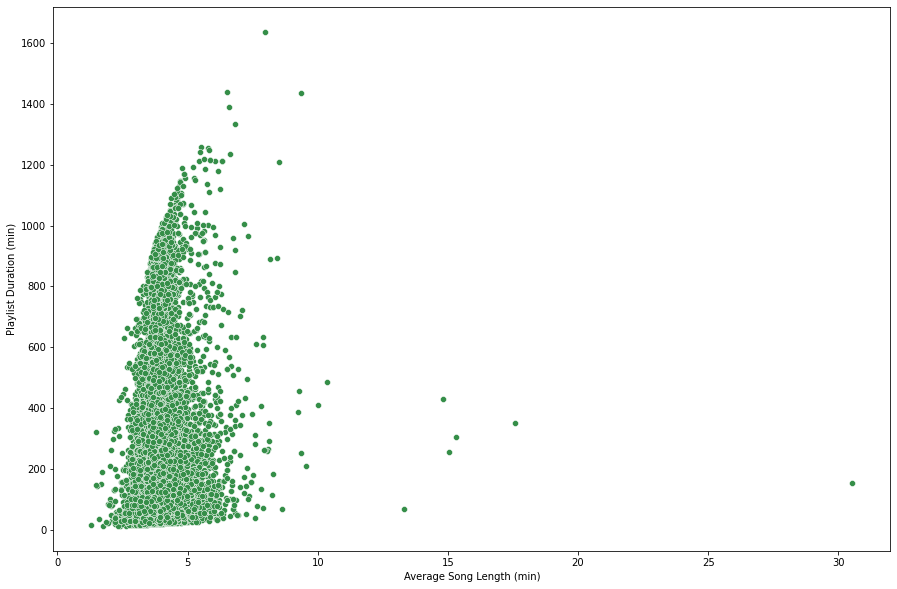

In [ ]:
figure = plt.gcf()
figure.set_size_inches(15, 10)
ax1 = sns.scatterplot(data=playlist_df, x="avg_song_length_min", y="duration_min")
ax1.set(xlabel="Average Song Length (min)", ylabel="Playlist Duration (min)")

Overall, the scatterplot suggests there might be *some* relationship (potentially a weak linear relationship) between average song length in a playlist and playlist duration.

### Are playlist titles usually positive, negative, or neutral? (Sentiment Analyis)
Using Afinn:

In [ ]:
# Sentiment Analysis using AFINN score:
from afinn import Afinn
af = Afinn()

def get_playlist_sentiment_afinn(name):
  words = name.split()
  total_score = 0
  # calculate AFINN score for playlist name
  for word in words:
    total_score += af.score(word)
  
  if total_score > 0:
    return "positive"
  elif total_score < 0:
    return "negative"
  else:
    return "neutral"

playlist_df['sentiment_afinn'] = playlist_df['name'].apply(get_playlist_sentiment_afinn)

In [ ]:
sentiment_list = playlist_df['sentiment_afinn'].tolist()
sentiment_counts = Counter(sentiment_list)
sentiment_counts

Counter({'negative': 657, 'neutral': 22251, 'positive': 2092})

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Sentiment')]

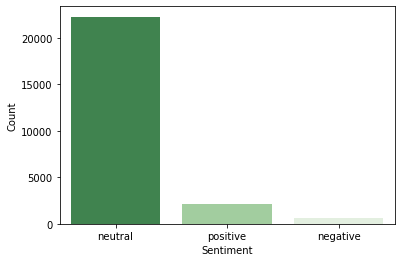

In [ ]:
sentiment_df = pd.DataFrame.from_dict(sentiment_counts, orient='index').reset_index()
sentiment_df.columns = ["sentiment", "count"]
ax2 = sns.barplot(x="sentiment", y="count", data=sentiment_df)
ax2.set(xlabel="Sentiment", ylabel="Count")

# Machine Learning— Attempt 2 :/
After spending a little too much trying to work with the previous dataset, we realized that trying to recommend songs based solely on the categorical variables we had—`track_name`, `artist_name`, `album_name`, and other crude metrics—would not be a prudent decision. After all, just because we might like one song on an album does not mean we'll like them all. That being said, we decided to pivot and take a look at the Spotify API data. 

The Spotify API has information similar to our original dataset, but *unlike* our other dataset, the Spotify API also has many other features that we could train our ML model on, such as acousticness, danceability, loudness, etc. These features seemed like much more reasonable metrics to train a model on (and also are numeric!), so we decided to continue with the Spotify API data instead.

## Initial Setup (Round 2)

In [4]:
!pip3 install 'spotipy==2.15'

In [5]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.exceptions import SpotifyException
import spotipy.util as util
import types

In [6]:
scope = "user-library-read playlist-read-collaborative"

client_id = 'e8dd057b45274ed9898cebee7407f63c'
client_secret = '2aeee29be2fb495b8e19a6c565e4e7e8'
redirect_uri = 'https://www.google.com'

username = 'massivemusic.com'

In [17]:
my_auth = SpotifyOAuth(client_id=client_id, client_secret=client_secret,
                                               redirect_uri=redirect_uri,
                                               scope=scope, username=username)

def _get_auth_response_interactive(self, open_browser=True):
        if not open_browser:
            self._open_auth_url()
            prompt = "Enter the URL you were redirected to: "
        else:
            url = self.get_authorize_url()
            prompt = (
                "Go to the following URL: {}\n"
                "Enter the URL you were redirected to: ".format(url)
            )
        response = self._get_user_input(prompt)
        state, code = SpotifyOAuth.parse_auth_response_url(response)
        if self.state is not None and self.state != state:
            raise SpotifyStateError(self.state, state)
        return code

my_auth._get_auth_response_interactive = types.MethodType(_get_auth_response_interactive, my_auth)
sp = spotipy.Spotify(auth_manager=my_auth)

# Data Loading, Wrangling, and Cleaning (Round 2)
## Let's first get all our songs!

In [15]:
spotify_user = 'massivemusic.com'
big_playlist_id = '1hMzceeWw7QiI6vaBkcEJO'

In [18]:
# read in tracks for a particular playlist using spotipy
def get_playlist(user, playlist_id):
  """gets a user's playlist as an object

  Parameters
  ----------
  user: current Spotify user ID
  playlist_id: Spotify ID of playlist

  Returns
  -------
  playlist: playlist object
  """
  if playlist_id is None:
      playlist_id = raw_input('Playlist ID: ')
      
  playlist = sp.user_playlist(user, playlist_id)
  return playlist

def get_playlist_tracks(username, playlist_id):
    try:
      results = sp.user_playlist_tracks(username, playlist_id)
      tracks = results['items']
      while results['next']:
          results = sp.next(results)
          tracks.extend(results['items'])
    except SpotifyException:
      print("Spotify Exception")
    return tracks

def get_playlist_name(playlist):
  """getting the name of the playlist

  Parameters
  ----------
  playlist: playlist object

  Returns
  -------
  name: playlist name
  """
  name = playlist['name']
  return name

def get_genres_from_playlist(user, playlist_id):
  """getting genres for a specific playlist

  Parameters
  ----------
  user: current Spotify user ID
  playlist_id: Spotify ID of playlist

  Returns
  ------
  genre_count: frequency list of genres associated with tracks
  """
  genre_count = {}
  playlist = get_playlist(user, playlist_id)
  tracks = all_playlist_tracks(playlist)
  for item in tracks:
      track = item['track']
      artists = track['artists']
      for artist in artists:
          artist_id = artist['id']
          if artist_id is not None:
              artist_obj = sp.artist(artist_id)
              genres = artist_obj['genres']
              for genre in genres:
                  if genre in genre_count:
                      genre_count[genre] = genre_count[genre] + 1;
                  else:
                      genre_count[genre] = 1;
  return genre_count  

def all_playlist_tracks(playlist):
  """gets all tracks as objects within a playlist

  Parameters
  ----------
  playlist: playlist object

  Returns
  -------
  tracks: set of track objects
  """
  results = playlist['tracks']
  tracks = results['items']
  while results['next']:
      results = sp.next(results)
      tracks.extend(results['items'])
  return tracks

def get_genres_from_tracks(tracks):
  """getting genres of tracks 
    Note: Spotify associates each artist with a specific genre, so this method
          gets the artists for each track and then finds all relevant genres
          associated with the artists

  Parameters
  ----------
  tracks: set of track objects

  Returns
  ------
  genre_count: frequency list of genres associated with tracks
  """
  genre_count = {}
  for track in tracks:
      artists = track['artists']
      for artist in artists:
          artist_id = artist['id']
          if artist_id is not None:
              artist_obj = sp.artist(artist_id)
              genres = artist_obj['genres']
              for genre in genres:
                  if genre in genre_count:
                      genre_count[genre] = genre_count[genre] + 1;
                  else:
                      genre_count[genre] = 1;
  return genre_count


mm_playlist = get_playlist(spotify_user, big_playlist_id)
mm_tracks = all_playlist_tracks(mm_playlist)

In [20]:
def get_audio_features_from_playlist(user, playlist_id):
  ids = []
  names = []
  afs = []
  playlist = get_playlist(user, playlist_id)
  if(playlist):
    playlist_name = get_playlist_name(playlist)
    tracks = all_playlist_tracks(playlist)
    for track in tracks:
        if(track):
          id = track['track']['id']
          name = track['track']['name'].encode('utf-8').decode()
          if id and name:
            audio_features = sp.audio_features(id)[0]
            if audio_features:
              audio_features['id'] = id;
              audio_features['name'] = name;
              afs.append(audio_features)
  audio_df = pd.DataFrame(afs)

  audio_df = audio_df[["name", "id", "acousticness", "danceability", "duration_ms", 
   "energy", "instrumentalness", "key", "liveness",
                          "loudness", "mode", "speechiness", "tempo", "valence"]]
  return audio_df

def get_audio_features_from_tracks(tracks):
  """getting audio features from a set of tracks

  Parameters
  ----------
  tracks: set of track objects

  Returns
  ------
  audio_df: dataframe containing audio features of each track
  """
  afs = []
  for track in tracks:
        if(track):
          id = track['id']
          name = track['name'].encode('utf-8').decode()
          if id and name:          
            audio_features = sp.audio_features(id)[0]
            if audio_features:
              audio_features['id'] = id;
              audio_features['name'] = name;
              if('played_at' in track):
                audio_features['played_at'] = track['played_at'];
              afs.append(audio_features)
  audio_df = pd.DataFrame(afs)


  if 'played_at' in audio_df.columns:
    audio_df = audio_df[["name", "id", "played_at", "acousticness", "danceability", "duration_ms", 
   "energy", "instrumentalness", "key", "liveness",
                             "loudness", "mode", "speechiness", "tempo", "valence"]]
  else: 
    audio_df = audio_df[["name", "id", "acousticness", "danceability", "duration_ms", 
   "energy", "instrumentalness", "key", "liveness",
                             "loudness", "mode", "speechiness", "tempo", "valence"]]
  return audio_df



In [ ]:
audio_df = get_audio_features_from_playlist(spotify_user, big_playlist_id)

In [10]:
audio_df.head(10)

,name,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,Under My Thumb,3E8gEvhLia6w9lQv3hfxzM,0.29800,0.738,221533,0.491,0.218000,6,0.1190,-13.407,0,0.0487,126.960,0.809
1,00h00,00LvjMnpznr4MZFSA8x9sA,0.33900,0.375,51373,0.606,0.000924,4,0.4240,-9.383,0,0.1970,91.564,0.883
2,Conquer Me,2jjPlj6KFzCffJ7KVQMwHX,0.21300,0.657,216235,0.488,0.094200,8,0.3600,-10.416,0,0.0456,149.763,0.662
3,Dapper (feat. Anderson .Paak),3seHx466iTcUmWE9dOVB3v,0.07110,0.753,193093,0.594,0.000000,1,0.3910,-9.486,0,0.0816,112.568,0.562
4,Sun Is Shining,3PPigifoeEofIISQYbayMK,0.12100,0.784,134573,0.520,0.001580,0,0.1460,-8.270,1,0.2270,72.678,0.854
5,Water Fountain,3pndgH9sLDTCWtCwr8LWt9,0.00337,0.825,183453,0.690,0.002770,1,0.3670,-6.234,1,0.0650,110.488,0.589
6,Ride A White Swan,3olQaoZDc2O1mFDod0evZI,0.79300,0.342,132800,0.442,0.000105,8,0.0758,-9.782,1,0.0346,147.700,0.804
7,Whatcha See Is Whatcha Get,6J7uQ9vLtBqNikEhlKUOnu,0.22600,0.638,212840,0.708,0.000000,6,0.1200,-10.383,1,0.1280,153.144,0.904
8,In Love With You,6uI95ERPZV6tivkNWsOKet,0.58000,0.720,322533,0.272,0.000000,9,0.1450,-12.919,0,0.0683,132.494,0.661
9,Sunday Girl,23yv078f5kc08Kj6DMpO0t,0.02560,0.641,185067,0.531,0.000248,9,0.1780,-13.691,1,0.0496,145.886,0.846


# Let's do some more data visualization!
We want to see what all our features look like, but first we need to normalize the data so we can see it on one graph.

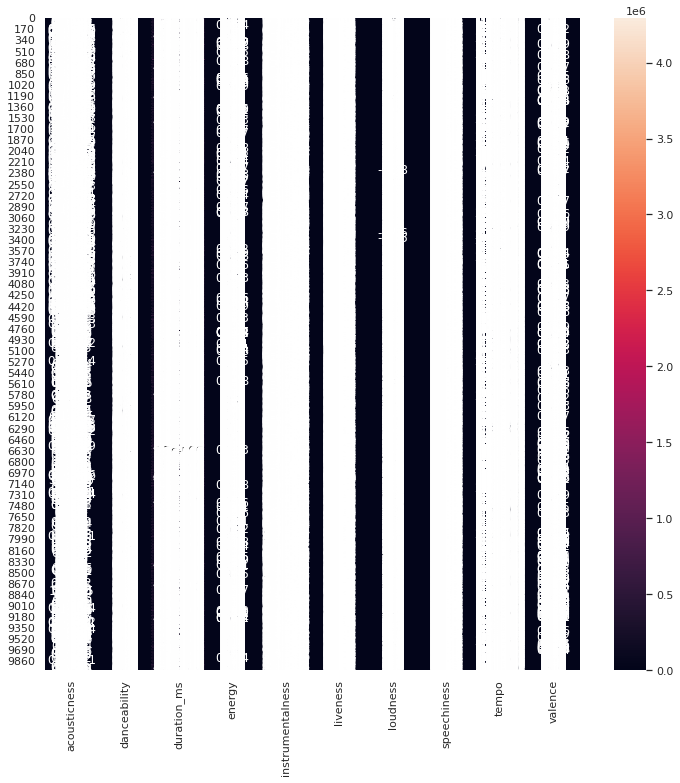

In [20]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(12, 12))
# ax = sns.heatmap(audio_df[['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']], annot=True)

## The Grand Finale— Let's Make Some Playlists with ML!

In [3]:
from sklearn.preprocessing import MinMaxScaler

feature_cols = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
# scale data with MinMaxScaler so it's in the range of [0, 1]
features_df = audio_df[feature_cols]
x = features_df.values
min_max_scaler = MinMaxScaler()
x_normalized = min_max_scaler.fit_transform(x)
spotify_ml_df = pd.DataFrame(x_normalized)

NameError: ignored

In [53]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np

distortion = []
kvals = np.arange(1, 502, 20)    # values to test for number of 
cluster_to_dist = {}             # map number of clusters to distortion

for k in kvals:
  print(k)
  model = KMeans(init='k-means++', n_clusters=k).fit(x_normalized)
  model.fit(x_normalized)

  distortion_val = sum(np.min(cdist(x_normalized, model.cluster_centers_, 'euclidean'), axis=1)) / x_normalized.shape[0]
  distortion.append(distortion_val)
  cluster_to_dist[k] = distortion_val

1
21
41
61
81
101
121
141
161
181
201
221
241
261
281
301
321
341
361
381
401
421
441
461
481
501


In [54]:
cluster_to_dist

{1: 0.5639632453826299,
 21: 0.3083115954773623,
 41: 0.2780767453531984,
 61: 0.2601729205986999,
 81: 0.24921626833750585,
 101: 0.2407479405828105,
 121: 0.2335122046802832,
 141: 0.22729647530864835,
 161: 0.2228088565504014,
 181: 0.21796862818652457,
 201: 0.21489072150839597,
 221: 0.21103967640916585,
 241: 0.20775232787916234,
 261: 0.2050653015242807,
 281: 0.20244836113235043,
 301: 0.2001580828960231,
 321: 0.19795931468254954,
 341: 0.19559438701432794,
 361: 0.19368183711211603,
 381: 0.19151268331722238,
 401: 0.18958660230691982,
 421: 0.18769830998712986,
 441: 0.1861401975145029,
 461: 0.1845590214333138,
 481: 0.1829735408039446,
 501: 0.18132018649699083}

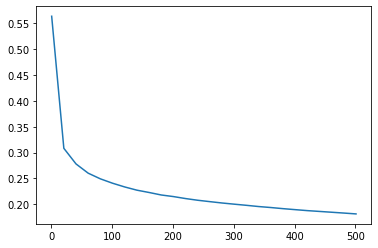

In [57]:
# elbow method
plt.plot(kvals, distortion)

In [85]:
kmeans_model = KMeans(init='k-means++', n_clusters=40).fit(x_normalized)

audio_df['kmeans_cluster'] = kmeans_model.labels_
features_df['cluster'] = kmeans_model.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [86]:
audio_df

,name,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,kmeans_cluster
0,Under My Thumb,3E8gEvhLia6w9lQv3hfxzM,0.2980,0.738,221533,0.491,0.218000,6,0.1190,-13.407,0,0.0487,126.960,0.809,22
1,00h00,00LvjMnpznr4MZFSA8x9sA,0.3390,0.375,51373,0.606,0.000924,4,0.4240,-9.383,0,0.1970,91.564,0.883,14
2,Conquer Me,2jjPlj6KFzCffJ7KVQMwHX,0.2130,0.657,216235,0.488,0.094200,8,0.3600,-10.416,0,0.0456,149.763,0.662,30
3,Dapper (feat. Anderson .Paak),3seHx466iTcUmWE9dOVB3v,0.0711,0.753,193093,0.594,0.000000,1,0.3910,-9.486,0,0.0816,112.568,0.562,21
4,Sun Is Shining,3PPigifoeEofIISQYbayMK,0.1210,0.784,134573,0.520,0.001580,0,0.1460,-8.270,1,0.2270,72.678,0.854,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Penthiou,4ih6AvAWSD1OBJIxah713h,0.5500,0.683,204952,0.658,0.000920,7,0.1510,-9.968,1,0.0478,118.706,0.563,10
9996,Lijay,57BxU4uqdbl6TITWtnQDMw,0.7050,0.824,324608,0.376,0.011500,3,0.1060,-11.921,1,0.2200,94.013,0.819,33
9997,Pretty Nice Life (feat. Tiken Jah Fakoly),7lL6ND4Jj1tWpoDFaJoxtS,0.5010,0.673,143533,0.568,0.000881,9,0.1390,-6.708,0,0.2390,170.131,0.568,34
9998,Take It Slow - Mousse T. Remix,1PNaGC2ihDmVCldSce119E,0.0972,0.684,216601,0.504,0.000290,9,0.3360,-8.913,1,0.0801,86.226,0.740,14


In [100]:
playlist_by_track_list = []
for _, playlist_df in audio_df.groupby(audio_df['kmeans_cluster']):
    playlist_by_track_list.append(playlist_df)

In [88]:
features_df

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,cluster
0,0.2980,0.738,221533,0.491,0.218000,0.1190,-13.407,0.0487,126.960,0.809,22
1,0.3390,0.375,51373,0.606,0.000924,0.4240,-9.383,0.1970,91.564,0.883,14
2,0.2130,0.657,216235,0.488,0.094200,0.3600,-10.416,0.0456,149.763,0.662,30
3,0.0711,0.753,193093,0.594,0.000000,0.3910,-9.486,0.0816,112.568,0.562,21
4,0.1210,0.784,134573,0.520,0.001580,0.1460,-8.270,0.2270,72.678,0.854,21
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.5500,0.683,204952,0.658,0.000920,0.1510,-9.968,0.0478,118.706,0.563,10
9996,0.7050,0.824,324608,0.376,0.011500,0.1060,-11.921,0.2200,94.013,0.819,33
9997,0.5010,0.673,143533,0.568,0.000881,0.1390,-6.708,0.2390,170.131,0.568,34
9998,0.0972,0.684,216601,0.504,0.000290,0.3360,-8.913,0.0801,86.226,0.740,14


In [93]:
import plotly.express as px

normalized_df = pd.DataFrame(x_normalized)
normalized_df.columns = feature_cols
agg_audio_df = pd.DataFrame()

features = []
values = []
clusters = []

selected_features = ['acousticness', 'danceability', 'valence', 'energy', 'liveness']

for cluster, cluster_df in features_df.groupby(features_df['cluster']):
  for f in selected_features:
    # append cluster 5 times, one for each feature in column
    clusters.append(cluster)
    # append name of feature
    features.append(f)
    # append mean for that feature
    values.append(cluster_df[f].mean())

agg_audio_df['cluster'] = clusters
agg_audio_df['value'] = values
agg_audio_df['feature'] = features

fig = px.line_polar(agg_audio_df, r="value", theta="feature", color="cluster", line_close=True)

fig.update_layout(
    width=1000,
    height=1000
)

fig.show()

Let's look at a slightly smaller version...



In [99]:
fig = px.line_polar(agg_audio_df.head(35), r="value", theta="feature", color="cluster", line_close=True, \
                    color_discrete_sequence=["#98FB98", "#2E8B57", "#00FF7F", "#32CD32", "#00FF00", "#66CDAA", "#90EE90"])

fig.update_layout(
    width=800,
    height=800
)

fig.show()

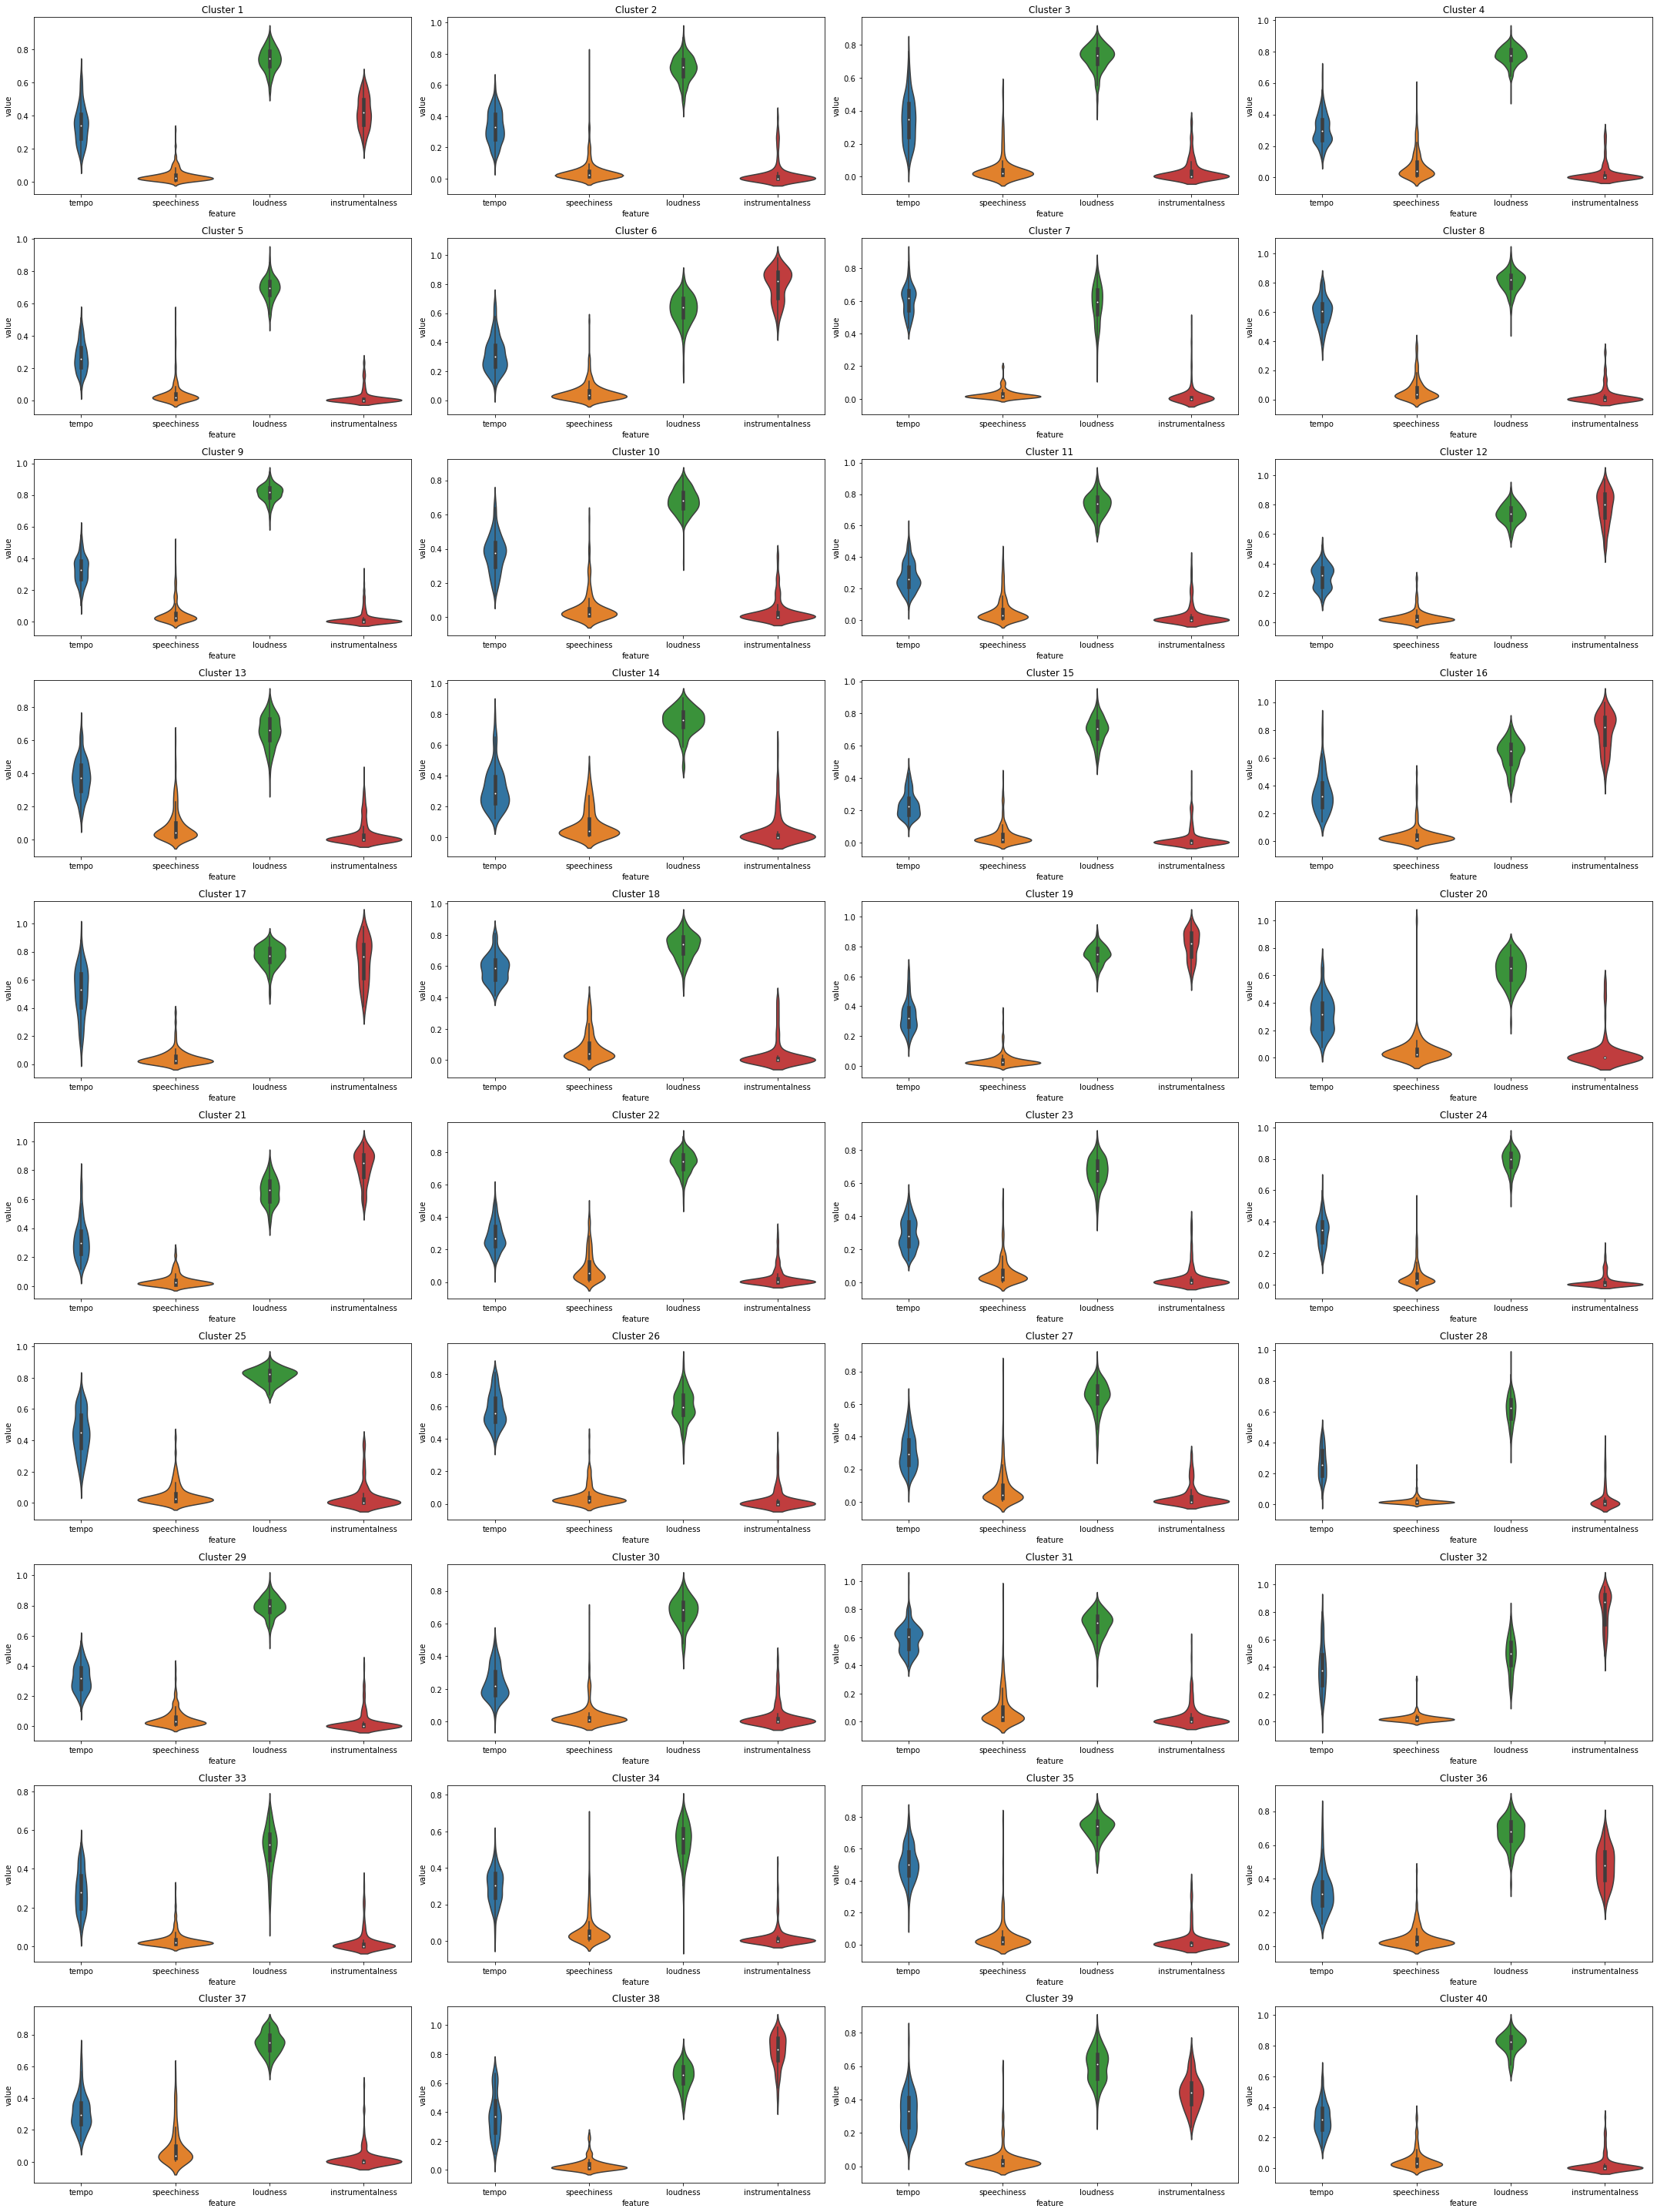

In [122]:
vplot_feature_cols = ['tempo', 'speechiness', 'loudness', 'instrumentalness']

normalized_df['cluster'] = features_df['cluster']

vplot_df_list = []
vp_fig, axes = plt.subplots(10, 4, figsize=(30, 40))

i = 0
j = 0
for cluster, cluster_df in normalized_df.groupby(normalized_df['cluster']):
  vplot_df = pd.DataFrame()
  vplot_features = []
  vplot_values = []
  vplot_cluster = []

  for feature in vplot_feature_cols:
    curr_vals = cluster_df[feature].tolist()
    vplot_values.extend(curr_vals)
    for i in range(len(curr_vals)):
      vplot_cluster.append(cluster)
      vplot_features.append(feature)

  vplot_df['feature'] = vplot_features
  vplot_df['value'] = vplot_values
  vplot_df['cluster'] = vplot_cluster

  vplot_df_list.append(vplot_df)

plot_idx = 0
for i in range(10):
  for j in range(4):
    sns.violinplot(ax=axes[i, j], x='feature', y='value', data=vplot_df_list[plot_idx]).set_title("Cluster " + str(plot_idx + 1))
    plot_idx += 1
  
vp_fig.tight_layout()
vp_fig.show()

## Let's Make Playlists for Our Own Liked Songs!

In [21]:
username2 = 'jc_716'
scope2 = "user-library-read playlist-read-collaborative playlist-modify-public playlist-modify-private"
# authentication for Jonathan's songs
my_auth2 = SpotifyOAuth(client_id=client_id, client_secret=client_secret,
                                               redirect_uri=redirect_uri,
                                               scope=scope2, username=username2)

def _get_auth_response_interactive(self, open_browser=True):
        if not open_browser:
            self._open_auth_url()
            prompt = "Enter the URL you were redirected to: "
        else:
            url = self.get_authorize_url()
            prompt = (
                "Go to the following URL: {}\n"
                "Enter the URL you were redirected to: ".format(url)
            )
        response = self._get_user_input(prompt)
        state, code = SpotifyOAuth.parse_auth_response_url(response)
        if self.state is not None and self.state != state:
            raise SpotifyStateError(self.state, state)
        return code

my_auth2._get_auth_response_interactive = types.MethodType(_get_auth_response_interactive, my_auth2)
sp2 = spotipy.Spotify(auth_manager=my_auth2)

In [22]:
def get_liked_songs():
    results = sp2.current_user_saved_tracks()
    tracks = []
    songs = results['items']
    while results['next']:
        results = sp2.next(results)
        songs.extend(results['items'])
    
    for track in songs:
      to_append = track['track']
      to_append['added_at'] = track['added_at']
      tracks.append(to_append)

    return tracks

liked_songs = get_liked_songs()

In [23]:
jc_audio_df = get_audio_features_from_tracks(liked_songs)

In [24]:
jc_audio_df.head(10)

,name,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,Outside,2i40wZkiPAGIFudrGH99nx,0.3420,0.860,203794,0.749,0.000000,1,0.4460,-6.556,0,0.0905,99.989,0.6000
1,"Bitch, Don’t Kill My Vibe",712uvW1Vezq8WpQi38v2L9,0.0152,0.587,310720,0.698,0.000000,1,0.4420,-8.948,1,0.0943,133.954,0.0985
2,Mystery Lady (feat. Don Toliver),2Ee9amLUslOwgoJWZEpSSD,0.3930,0.747,228453,0.494,0.000000,3,0.0982,-7.957,0,0.1410,76.006,0.6240
3,Divine,2WEL9njjdxNf4DJOnDYexx,0.1490,0.386,193587,0.556,0.000000,5,0.3340,-5.969,1,0.1780,76.174,0.6550
4,Cologne - Single Version,1kx9guD59iMWgLeWh0sfHn,0.0890,0.726,168511,0.511,0.023400,6,0.1130,-8.750,0,0.0826,140.973,0.5980
5,Lemon Baby,5hJBPjlA5HpNGETVcjuAvS,0.1890,0.750,170058,0.586,0.000022,9,0.4250,-7.484,1,0.1750,97.153,0.5800
6,Favorite Mistake,4rHIfYRQw6ittRQXAlurk0,0.7770,0.535,172907,0.409,0.000000,7,0.1290,-9.517,0,0.0855,170.123,0.1380
7,Ride My Bike,2cLmaOOZzVpi8teYw2dkBQ,0.0124,0.606,195573,0.495,0.000000,8,0.1040,-8.349,1,0.1280,131.213,0.2700
8,Fussy,1fFbXlSABWTL7GuzJTS6yu,0.7310,0.631,200613,0.359,0.000000,1,0.0966,-6.771,1,0.0909,179.942,0.5800
9,DITTO,30AnNG3dFbHLQuSbIVWEbF,0.5240,0.645,150323,0.579,0.000018,4,0.1610,-9.137,1,0.1000,92.977,0.5250


In [25]:
jc_feature_cols = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# scale data with MinMaxScaler so it's in the range of [0, 1]
jc_features_df = jc_audio_df[jc_feature_cols]
jc_x = jc_features_df.values
min_max_scaler2 = MinMaxScaler()
jc_x_normalized = min_max_scaler2.fit_transform(jc_x)
jc_spotify_df = pd.DataFrame(jc_x_normalized)

In [27]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np

distortion = []
K = range(1, 51)    # values to test for number of 
cluster_to_dist = {}             # map number of clusters to distortion

for k in K:
  print(k)
  jc_model = KMeans(init='k-means++', n_clusters=k).fit(jc_x_normalized)
  jc_model.fit(jc_x_normalized)

  distortion_val = sum(np.min(cdist(jc_x_normalized, jc_model.cluster_centers_, 'euclidean'), axis=1)) / jc_x_normalized.shape[0]
  distortion.append(distortion_val)
  cluster_to_dist[k] = distortion_val

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


KeyboardInterrupt: ignored

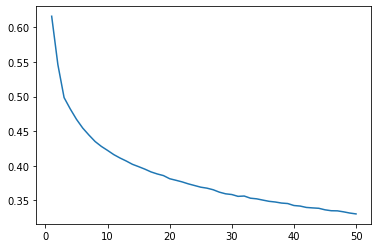

In [156]:
plt.plot(K, distortion)

In [158]:
cluster_to_dist

{1: 0.6160507616319747,
 2: 0.5461150560109843,
 3: 0.4984971584622068,
 4: 0.4820093237976468,
 5: 0.46705301119852927,
 6: 0.4544834416207045,
 7: 0.4443865753426145,
 8: 0.4350064728988746,
 9: 0.42797341251809085,
 10: 0.42218961377341024,
 11: 0.41612745198414725,
 12: 0.4112299051669863,
 13: 0.40690708110542373,
 14: 0.4021219083054679,
 15: 0.3987150637944058,
 16: 0.3951387883529376,
 17: 0.39111008833529654,
 18: 0.38816662307090094,
 19: 0.3858134475526308,
 20: 0.3812751663975616,
 21: 0.3790581796542012,
 22: 0.376715167162318,
 23: 0.37385989372389383,
 24: 0.37147344376585795,
 25: 0.3690606405591466,
 26: 0.36764829676679317,
 27: 0.36536591238424626,
 28: 0.36187206899175994,
 29: 0.3594799189833584,
 30: 0.3584475745873206,
 31: 0.3558178725243963,
 32: 0.35626978887882477,
 33: 0.35314794948477585,
 34: 0.35223013130065445,
 35: 0.3503987525763277,
 36: 0.3486315220710626,
 37: 0.34764715946642344,
 38: 0.3461246529008849,
 39: 0.34543176211313276,
 40: 0.34257398878

In [28]:
jc_kmeans_model = KMeans(init='k-means++', n_clusters=20).fit(jc_x_normalized)

jc_audio_df['kmeans'] = jc_kmeans_model.labels_

In [29]:
jc_cluster_dfs = []
for _, g in jc_audio_df.groupby(jc_audio_df['kmeans']):
    jc_cluster_dfs.append(g)

In [33]:
pd.set_option('display.max_rows', jc_cluster_dfs[0].shape[0]+1)
print(jc_cluster_dfs[0])

                                                   name  ... kmeans
5                                            Lemon Baby  ...      0
10                           CHAIN ON (feat. JPEGMAFIA)  ...      0
35                                        Remember When  ...      0
75                                 Car Crash in G Major  ...      0
260                           Stuck Inside (feat. Cujo)  ...      0
261                                       It's All Love  ...      0
271                                         COMING DOWN  ...      0
294                                     Chicken Tenders  ...      0
298                                       100 Grandkids  ...      0
300                                            TEACH ME  ...      0
304                                       Madiba Riddim  ...      0
340                                            I Wonder  ...      0
348                                         Parking Lot  ...      0
349                                           D.

In [31]:
token = util.prompt_for_user_token(username2,scope2,client_id=client_id,client_secret=client_secret,redirect_uri='http://localhost:8080/') 
sp3 = spotipy.Spotify(auth=token)
sp3.user_playlist_create(username2, name='test1')

{'collaborative': False,
 'description': '',
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/7yXlUYAqzkGjNDPcmSDLBb'},
 'followers': {'href': None, 'total': 0},
 'href': 'https://api.spotify.com/v1/playlists/7yXlUYAqzkGjNDPcmSDLBb',
 'id': '7yXlUYAqzkGjNDPcmSDLBb',
 'images': [],
 'name': 'test1',
 'owner': {'display_name': 'jc_716',
  'external_urls': {'spotify': 'https://open.spotify.com/user/jc_716'},
  'href': 'https://api.spotify.com/v1/users/jc_716',
  'id': 'jc_716',
  'type': 'user',
  'uri': 'spotify:user:jc_716'},
 'primary_color': None,
 'public': True,
 'snapshot_id': 'MSwzNTRhZTY2YjYzM2VlZTkwNDdiNDE5NWI3MjNhZTczNWZmZDU4ODg1',
 'tracks': {'href': 'https://api.spotify.com/v1/playlists/7yXlUYAqzkGjNDPcmSDLBb/tracks',
  'items': [],
  'limit': 100,
  'next': None,
  'offset': 0,
  'previous': None,
  'total': 0},
 'type': 'playlist',
 'uri': 'spotify:playlist:7yXlUYAqzkGjNDPcmSDLBb'}

In [34]:
jc_cluster_dfs[0]

,name,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,kmeans
5,Lemon Baby,5hJBPjlA5HpNGETVcjuAvS,0.18900,0.750,170058,0.586,0.000022,9,0.425,-7.484,1,0.1750,97.153,0.580,0
10,CHAIN ON (feat. JPEGMAFIA),5Tutv8aK0ZJFciloVv6WDT,0.22300,0.703,201253,0.804,0.000000,6,0.689,-6.539,0,0.3980,85.263,0.536,0
35,Remember When,5naar7XewEOAjOywIp6Jjq,0.00112,0.504,155147,0.708,0.000424,11,0.788,-5.896,0,0.0343,82.009,0.510,0
75,Car Crash in G Major,3zt5zKBpsliBi0aDldNBsX,0.27700,0.709,132000,0.517,0.118000,7,0.484,-8.077,1,0.0335,105.369,0.429,0
260,Stuck Inside (feat. Cujo),0KvdSMm6RzGeqydChJG3kU,0.02270,0.756,179853,0.671,0.000003,8,0.662,-6.545,1,0.1840,130.916,0.625,0
261,It's All Love,62xFtXfi1MpX9Mqyv4rZzl,0.02210,0.678,215333,0.665,0.000000,7,0.417,-7.004,1,0.1380,91.524,0.489,0
271,COMING DOWN,09Z3vqWLXnpCytqf3vZfEy,0.09870,0.689,199453,0.638,0.000001,10,0.456,-8.121,0,0.1460,108.022,0.612,0
294,Chicken Tenders,3D8sT8D3f5egWSQnF0fbqu,0.26800,0.746,170405,0.741,0.000000,11,0.644,-5.459,1,0.0567,119.983,0.720,0
298,100 Grandkids,4z0PnuB07fxtVZZRWsCfxb,0.37100,0.735,278507,0.749,0.000000,10,0.470,-3.766,0,0.0874,93.718,0.373,0
300,TEACH ME,0dKn1KXyv19UHNldRtayID,0.12900,0.709,282073,0.602,0.000024,11,0.511,-3.210,0,0.0651,156.954,0.492,0


In [35]:
track_ids = jc_cluster_dfs[0]['id']
res = sp3.user_playlist_add_tracks(username2, '7yXlUYAqzkGjNDPcmSDLBb', track_ids)

## How similar are playlists?
Now, with an understanding of the playlist structure. We want to set the foundation for our recommendation system. This recommendation system is based on the following hypothesis... 

Simply put, **our music taste is not that unique**. 

We hypothesize that every playlist will at least have one other like it. We define the following scoring system. For every tuple of playlists, we will give a score. Let us call the first playlist P1, and the second playlist P2. 


In [ ]:
# # do not run cell
# # algorithm is fake :o

# artist_score = 0
# for every artist A in P1, P2:
#   p1_count = number of songs by A in P1
#   p2_count = number of songs by A in P2
#   artist_score += min(p1_count, p2_count)

# final_score =  artist_score/(min(len(p1), len(p2)))

SyntaxError: ignored

In [ ]:
# same avg songs per playlist

With this scoring system in mind, we will define the following:

Ranked from 1 to 3, 1 being the most similar. 
1.   Very Similar: ≥ 0.3
2.   Pretty Similar: ≥ 0.2
3.   Similar: ≥ 0.1
4.   Not Similar < 0.1

Therefore, our hypothesis is:
**Every playlist will have at least one playlist that it is VERY similar too.**

In [ ]:
# def train_set():

In [ ]:
# train set

In [ ]:
# def test_set():

In [ ]:
# test set 

## Spotify Recommendations

yuhhh machine learning section what is this

## Okay... maybe Spotify won't adopt our algorithm.

As expected, Spotify's recommendation system is much more complex and effective than ours. If we had additional data and advanced technology, we may have been able to address our following challenges. Let us analyze issues we ran into and how Spotify addresses them. 

Our main challenges included:
1.   Efficiency

Spotify has... 

2.   Recommendation + Information Acceess

Spotify's recommendation algorithm is based on several more parameters than ours. As opposed to just artist similarity (etc)

We also do not have access to ...

3.   Math

The crux of Spotify's [recommendation algorithm](https://towardsdatascience.com/how-spotify-recommends-your-new-favorite-artist-8c1850512af0#:~:text=Well%2C%20Spotify's%20recommender%20system%20provides,it%20deems%20%E2%80%9Csimilar%E2%80%9D%20users.) is trifold. 

"There are three recommendation models at work on Spotify:

1. Collaborative filtering: Uses your behavior and that of similar users.

2. Natural Language Processing (NLP): For song lyrics, playlists, blog posts, social media comments.

3. Audio models: Used on raw audio."

With its recommendations, Spotify has three main methods for motivating music exploration i.e. curating Discover Weekly, Radio, and recommended songs under each playlist.

1. Fully Randomized Experiment

2. Random Data Collection

3. Bandit Policy
 






## Party Playlist

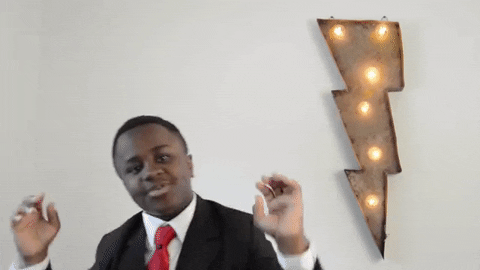